<a href="https://colab.research.google.com/github/shebegyare131/shebegyare131/blob/main/Pressure%20Data%20Analysis_Using_FBprophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [160]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
import random
import seaborn as sns
from fbprophet import Prophet

In [186]:
#df=pd.read_csv('WW.csv')
#df.head()

import pandas as pd


def remove_timezone_label(data):

    pos = data.index('+00:00')

    # Slice data to get rid of the tz, then strip leading/trailing whitespace
    data = (data[:pos]).strip()

    return data


if __name__ == '__main__':
    df=pd.read_csv("WW.csv")

    # the apply() function is used to carry out a function on the data.
    df["created_at"] = df["created_at"].apply(remove_timezone_label)

    df.to_csv("WW_NEW.csv", index=False)

In [187]:
df.head()

,created_at,entry_id,Temperature,PH,Turbidity,flow,TDS,Pressure,Volume,Color
0,2022-03-27T15:07:07,1,29.19,7.11,0.0,2,0.0,96.75,84.34,64
1,2022-03-27T15:07:34,2,29.19,7.13,0.0,1,0.0,61.16,84.35,64
2,2022-03-27T15:07:53,3,29.19,7.13,0.0,1,0.0,63.35,1.16,64
3,2022-03-27T15:08:24,4,29.12,7.15,0.0,1,0.0,69.43,84.35,64
4,2022-03-27T15:08:40,5,29.19,7.14,0.0,2,0.0,69.43,84.36,64


In [188]:
df=df.drop(['Temperature'],axis=1)
df=df.drop(['PH'],axis=1)
df=df.drop(['Turbidity'],axis=1)
df=df.drop(['flow'],axis=1)
df=df.drop(['TDS'],axis=1)
#df=df.drop(['Pressure'],axis=1)
df=df.drop(['Volume'],axis=1)
df=df.drop(['Color'],axis=1)
df=df.drop(['entry_id'],axis=1)
df.head(200)

,created_at,Pressure
0,2022-03-27T15:07:07,96.75
1,2022-03-27T15:07:34,61.16
2,2022-03-27T15:07:53,63.35
3,2022-03-27T15:08:24,69.43
4,2022-03-27T15:08:40,69.43
...,...,...
195,2022-03-27T17:06:30,57.01
196,2022-03-27T17:15:42,57.01
197,2022-03-27T17:16:01,57.01
198,2022-03-27T17:16:18,57.01


In [ ]:
#Load Data
df=pd.read_csv("HQQ.csv")
#url = 'https://api.foodsecurityportal.org/en/datastore/dump/1daac0af-9c6c-5b9f-b879-5dbb42f2d4b5'
#df = pd.read_csv(url)
df.head(10)

In [ ]:
#df = df.drop(['PH'], axis=1)
df = df.drop(['Oxygen Consumption'], axis=1)
df = df.drop(['Ammonia Nitrogen'], axis=1)
#df = df.drop(['commodity'], axis=1)
df = df.drop(['Dissolved Oxygen'], axis=1)
#df = df.drop(['source_name'], axis=1)
#df = df.drop(['source_url'], axis=1)
#df = df.drop(['minPrice'], axis=1)
#df = df.drop(['maxPrice'], axis=1)
#df = df.drop(['percentageChange'], axis=1)
#df = df.drop(['last_sync'], axis=1)
#df = df.drop(['Oxygen Consumption'], axis=1) 
#df = df.drop(['timestamp'], axis=1)


df.head()

In [189]:
df.tail()

,created_at,Pressure
60164,2022-04-12T18:10:02,51.92
60165,2022-04-12T18:10:18,51.92
60166,2022-04-12T18:10:34,51.92
60167,2022-04-12T18:10:50,51.92
60168,2022-04-12T18:11:06,51.92


In [190]:
df.isnull().sum()

created_at    0
Pressure      0
dtype: int64

In [191]:
df.shape

(60169, 2)

In [192]:
#conversion_rate = 85.33
#df['price'] = conversion_rate * df['price']
#df.head()

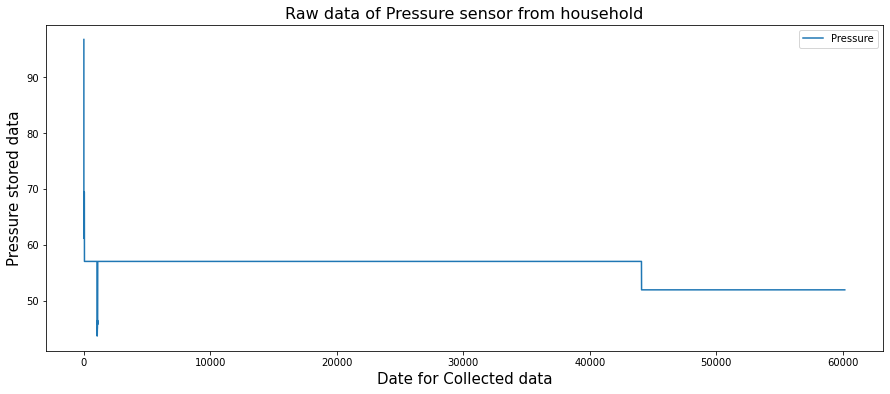

In [193]:
df.plot(figsize=(15, 6))
plt.title("Raw data of Pressure sensor from household", fontsize=16)
plt.ylabel("Pressure stored data", fontsize=15)
plt.xlabel("Date for Collected data", fontsize=15)
plt.show()

In [194]:
df.columns = ['ds', 'y'] #required by fbprophet
df.head()

,ds,y
0,2022-03-27T15:07:07,96.75
1,2022-03-27T15:07:34,61.16
2,2022-03-27T15:07:53,63.35
3,2022-03-27T15:08:24,69.43
4,2022-03-27T15:08:40,69.43


In [195]:
df['ds'] = pd.to_datetime(df['ds'])
df.head()

,ds,y
0,2022-03-27 15:07:07,96.75
1,2022-03-27 15:07:34,61.16
2,2022-03-27 15:07:53,63.35
3,2022-03-27 15:08:24,69.43
4,2022-03-27 15:08:40,69.43


In [196]:
df = df.sort_values(by='ds')
df

,ds,y
0,2022-03-27 15:07:07,96.75
1,2022-03-27 15:07:34,61.16
2,2022-03-27 15:07:53,63.35
3,2022-03-27 15:08:24,69.43
4,2022-03-27 15:08:40,69.43
...,...,...
60164,2022-04-12 18:10:02,51.92
60165,2022-04-12 18:10:18,51.92
60166,2022-04-12 18:10:34,51.92
60167,2022-04-12 18:10:50,51.92


In [197]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

In [198]:
model = Prophet()

In [199]:
df.columns

Index(['ds', 'y'], dtype='object')

In [200]:
model.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [201]:
model.component_modes

{'additive': ['weekly',
  'daily',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [202]:
df.tail()

,ds,y
60164,2022-04-12 18:10:02,51.92
60165,2022-04-12 18:10:18,51.92
60166,2022-04-12 18:10:34,51.92
60167,2022-04-12 18:10:50,51.92
60168,2022-04-12 18:11:06,51.92


In [203]:
future_dates = model.make_future_dataframe(periods=180)

In [204]:
future_dates.tail()

,ds
60344,2022-10-05 18:11:06
60345,2022-10-06 18:11:06
60346,2022-10-07 18:11:06
60347,2022-10-08 18:11:06
60348,2022-10-09 18:11:06


In [205]:
pred = model.predict(future_dates)
pred.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-03-27 15:07:07,60.781515,57.326054,58.660556,60.781515,60.781515,-2.739527,-2.739527,-2.739527,0.225807,0.225807,0.225807,-2.965334,-2.965334,-2.965334,0.0,0.0,0.0,58.041987
1,2022-03-27 15:07:34,60.780733,57.410967,58.668770,60.780733,60.780733,-2.740105,-2.740105,-2.740105,0.225302,0.225302,0.225302,-2.965407,-2.965407,-2.965407,0.0,0.0,0.0,58.040628
2,2022-03-27 15:07:53,60.780184,57.382211,58.744247,60.780184,60.780184,-2.740513,-2.740513,-2.740513,0.224945,0.224945,0.224945,-2.965458,-2.965458,-2.965458,0.0,0.0,0.0,58.039670
3,2022-03-27 15:08:24,60.779287,57.416618,58.651101,60.779287,60.779287,-2.741182,-2.741182,-2.741182,0.224359,0.224359,0.224359,-2.965541,-2.965541,-2.965541,0.0,0.0,0.0,58.038104
4,2022-03-27 15:08:40,60.778824,57.354526,58.665955,60.778824,60.778824,-2.741529,-2.741529,-2.741529,0.224055,0.224055,0.224055,-2.965584,-2.965584,-2.965584,0.0,0.0,0.0,58.037295


In [206]:
#pred = pred[['ds', 'yhat']]
#pred

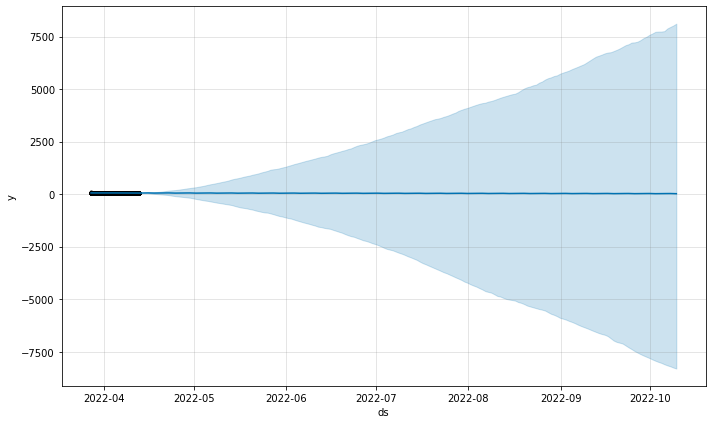

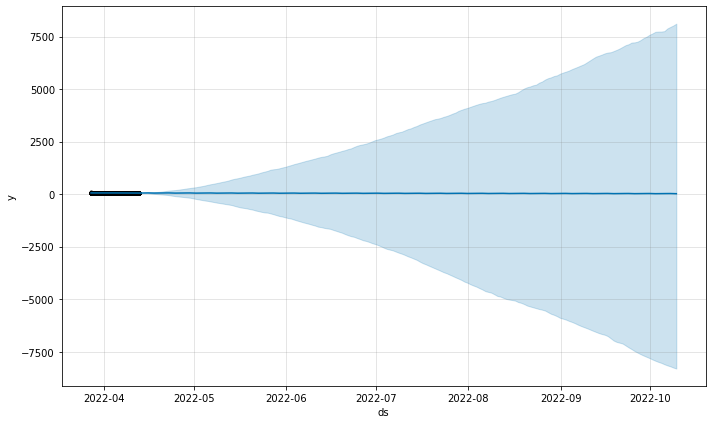

In [207]:
model.plot(pred)

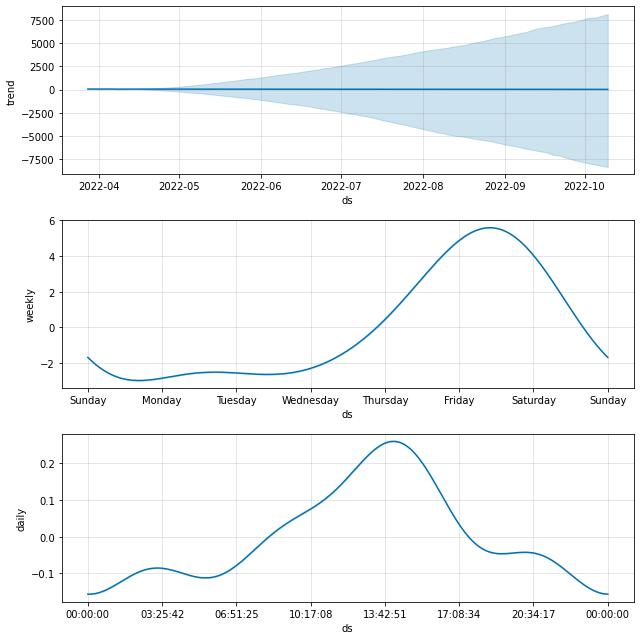

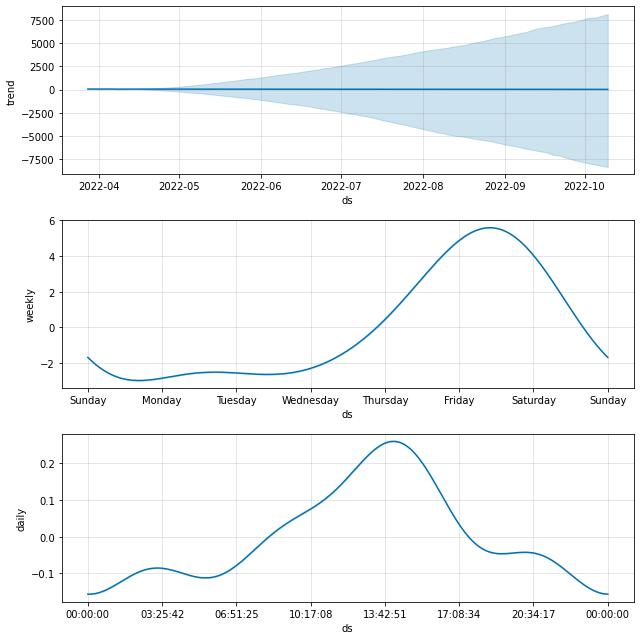

In [208]:
model.plot_components(pred)

In [211]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='9 days', period='6 days', horizon='3 days')
#df_cv = cross_validation(model, initial='365 days', period='90 days', horizon='180 days')
df_cv.head()

INFO:fbprophet:Making 1 forecasts with cutoffs between 2022-04-09 18:11:06 and 2022-04-09 18:11:06


  0%|          | 0/1 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2022-04-09 21:35:48,53.001317,51.873177,54.083255,51.92,2022-04-09 18:11:06
1,2022-04-09 21:36:04,53.002779,51.893406,54.082585,51.92,2022-04-09 18:11:06
2,2022-04-09 21:36:20,53.004242,51.839176,54.047659,51.92,2022-04-09 18:11:06
3,2022-04-09 21:36:38,53.005888,51.958719,54.199415,51.92,2022-04-09 18:11:06
4,2022-04-09 21:36:54,53.007353,51.878908,54.147049,51.92,2022-04-09 18:11:06


In [212]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,0 days 09:52:40,8.383313,2.895395,2.700436,0.052011,0.050314,0.026374
1,0 days 09:52:56,8.398146,2.897956,2.703034,0.052062,0.050366,0.025641
2,0 days 09:53:12,8.412996,2.900516,2.705633,0.052112,0.050418,0.024908
3,0 days 09:53:28,8.427861,2.903078,2.708233,0.052162,0.050471,0.024176
4,0 days 09:53:43,8.442742,2.905640,2.710834,0.052212,0.050523,0.024176


/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


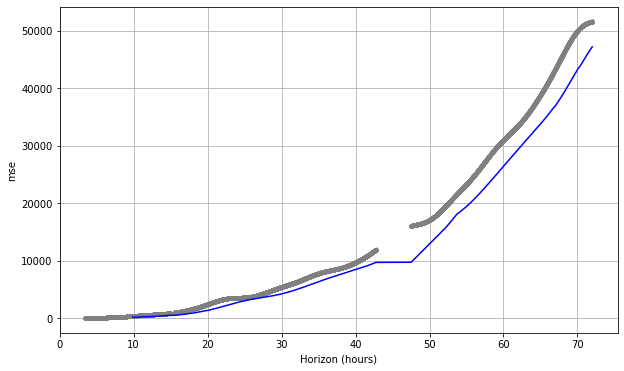

In [209]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mse')

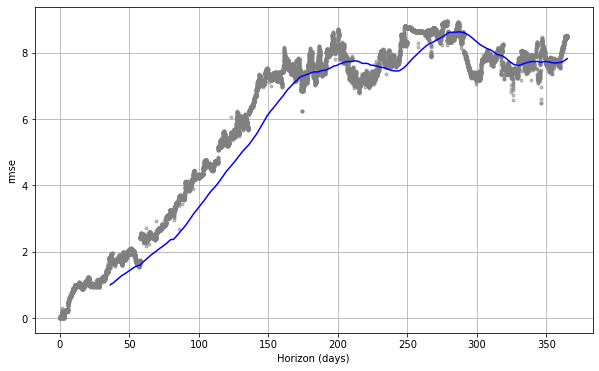

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')

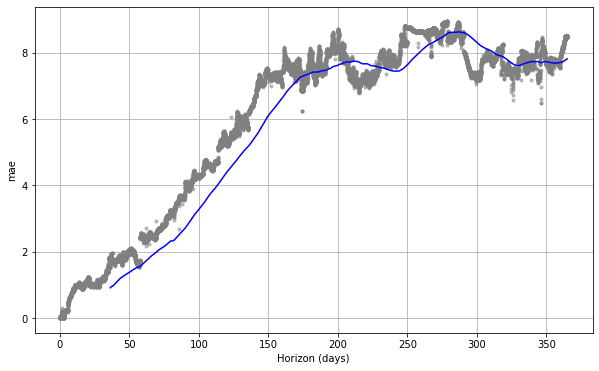

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mae')

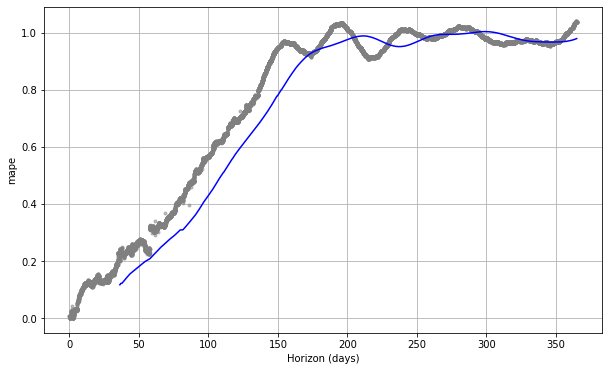

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

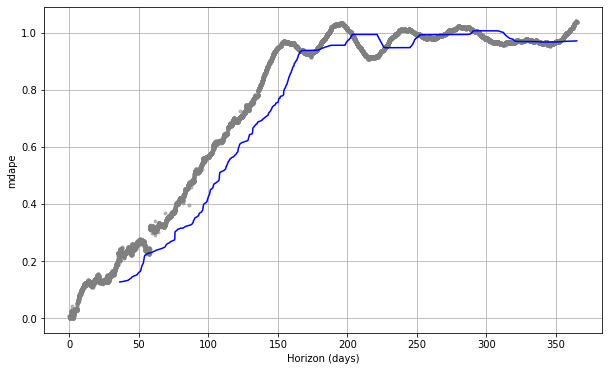

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mdape')